# Model Evaluation

[Link to the dataset](https://www.kaggle.com/mikecalgary/diamond-model-optimization-for-99-accuracy)

## Loading and preparing the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv('source/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(data):
    categories = (X.dtypes =="object")
    cat_cols = list(categories[categories].index)
    
    feature_label_encoder_dict = {}
    for col in cat_cols:
        feature_label_encoder_dict[col] = LabelEncoder()
        X[col] = feature_label_encoder_dict[col].fit_transform(X[col])

In [6]:
from sklearn.preprocessing import StandardScaler

def scale_numerical(data):
    scaler = StandardScaler()
    data[data.columns] = scaler.fit_transform(data[data.columns])

## Regression

In [7]:
X = df.drop("price", axis = 1)
y = df["price"]

In [8]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [9]:
encode_labels(X)

In [10]:
scale_numerical(X)

In [11]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198168,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.434949,1.414272,0.675442,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.511147,2.002131,-0.484264,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np

def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

R^2 :  0.8851397433679632
MAE : 858.7084697710083
RMSE: 1351.263479683125


In [15]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
run_experiment(model)

R^2 :  0.8848355338431381
MAE : 856.7981103209527
RMSE: 1353.0517196416642


## Classification

In [16]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [17]:
def set_target(x):
    golden_set = ['Ideal', 'Premium', 'Very Good']
    if x in golden_set:
        return 'Gold'
    return 'Silver'
df['target'] = df['cut'].apply(lambda x: set_target(x))

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,target
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Gold
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Gold
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Silver
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Gold
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Silver


In [19]:
X = df.drop(["target", "cut"], axis = 1)
y = df["target"]

In [20]:
encode_labels(X)
scale_numerical(X)

In [21]:
X.head()

,carat,color,clarity,depth,table,price,x,y,z
0,-1.198168,-0.937163,-0.484264,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-0.937163,-1.064117,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-0.937163,0.095589,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,1.414272,0.675442,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,2.002131,-0.484264,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [22]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc(model):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label='auc=%.3f' % auc, color='#084081')
    axis_ranges = [0,1]
    plt.plot(axis_ranges, axis_ranges, linestyle='--', color='k', scalex=False, scaley=False)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

In [26]:
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test, cmap='GnBu') 
    plt.rcParams["font.size"] = "15"
    plt.show()
    [tp,fp], [fn,tn] = confusion_matrix(y_test, y_pred)
    
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1: %.3f' % f1_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    plot_roc(model)

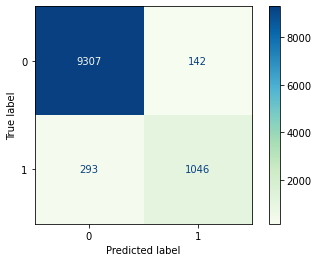

Precision: 0.880
Recall: 0.781
F1: 0.828
Accuracy: 0.960


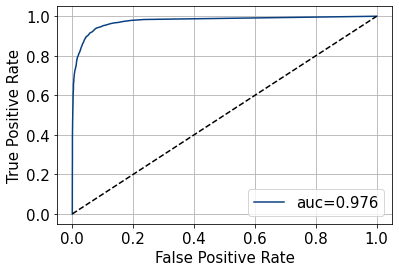

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
run_experiment(model)

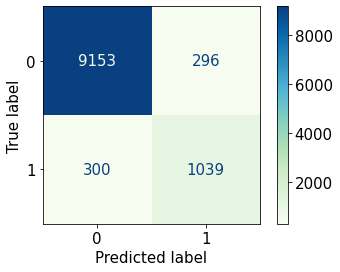

Precision: 0.778
Recall: 0.776
F1: 0.777
Accuracy: 0.945


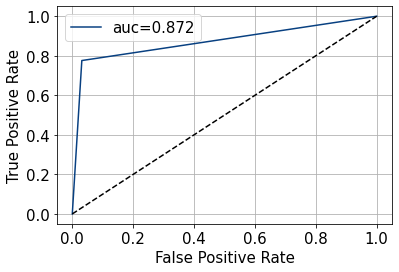

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
run_experiment(model)

## Clustering

In [29]:
X = df[['price', 'carat']]

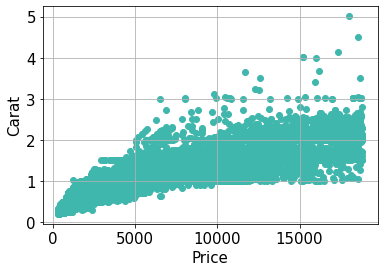

In [30]:
plt.scatter(X['price'],X['carat'], color='#40B7AD')
plt.xlabel('Price')
plt.ylabel('Carat')
plt.grid()
plt.show()

In [31]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
labels = model.fit_predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

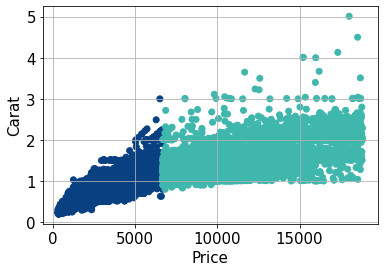

In [32]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#40B7AD', '#084081'])
plt.scatter(X['price'],X['carat'], c=labels, cmap=cmap)
plt.xlabel('Price')
plt.ylabel('Carat')
plt.grid()
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

silhouette_score(X,labels)

0.7077840128371987

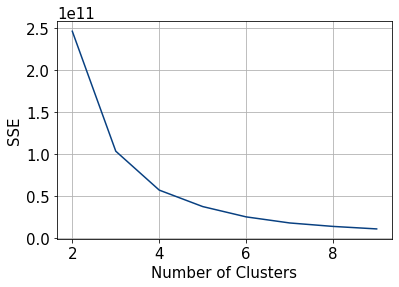

In [34]:
# elbow method
sse = {}
for i in range(2,10):
    model = KMeans(n_clusters=i)
    labels = model.fit_predict(X)
    sse[i] = model.inertia_
plt.plot(sse.keys(), sse.values(),color='#084081')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()